# <span style="color: rgb(138, 92, 245);">Segmentos de Jugadores con Características Similares en FIFA 19</span>

---------------------

Los conjuntos de datos proporcionados incluyen los atributos detallados de cada jugador
registrado en la última edición de la base de datos FIFA 19 (videojuego FIFA 2019). Atributos como el sueldo,
la posición, nacionalidad, etc. Se cuenta con más de 18K registros y 89 atributos. El objetivo del dataset es encontrar segmentos de jugadores con atributos **técnicos/físicos/mentales** similares.

Este notebook puede ser encontrado en el repositorio de [github.com/AuriRaven/Unsupervised_Learning](https://github.com/AuriRaven/Unsupervised_Learning).

Se comienza por leer el dataset y revisar sus características básicas. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/data_fifa.csv')

In [3]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

# <span style="color: rgb(138, 92, 245);">I. Clasificación de Variables</span>

Coniderando este resumen del dataset, se continua por identificar los tipos de variables. De esta manera será más fácil la ingeniería y limpieza que las variables puedan necesitar 

**Tipos de variables:**
* Variables numericas : Discretas y continuas
* Variables categoricas
* Variables tipo fecha
* Variables de texto : comentarios, descripciones, url
* Variables geograficas

## <span style="color: rgb(138, 92, 245);">1. Variables numéricas</span>

### 🔷 Numéricas discretas (enteros, conteos, categorías codificadas en números)

* `ID`

* `Age`

* `Overall`

* `Potential`

* `Special`

* `Jersey Number` (aunque viene como float, conceptualmente es discreta)

### 🔷 Numéricas continuas (tienen decimales, medidas, ratings)

(Nota: muchas son “skills” de posiciones y vienen como float)

#### **Posiciones (rating por posición):**

* `LS`

* `ST`

* `RS`

* `LW`

* `LF`

* `CF`

* `RF`

* `RW`

* `LAM`

* `CAM`

* `RAM`

* `LM`

* `LCM`

* `CM`

* `RCM`

* `RM`

* `LWB`

* `LDM`

* `CDM`

* `RDM`

* `RWB`

* `LB`

* `LCB`

* `CB`

* `RCB`

* `RB`

#### **Atributos técnicos:**

* `International Reputation`

* `Weak Foot`

* `Skill Moves`

* `Crossing`

* `Finishing`

* `HeadingAccuracy`

* `ShortPassing`

* `Volleys`

* `Dribbling`

* `Curve`

* `FKAccuracy`

* `LongPassing`

* `BallControl`

#### **Atributos físicos y de movimiento:**

* `Acceleration`

* `SprintSpeed`

* `Agility`

* `Reactions`

* `Balance`

* `ShotPower`

* `Jumping`

* `Stamina`

* `Strength`

* `LongShots`

* `Height` (formato “5'11”) Se neceista limpieza y convertir a numérica

* `Weight` (formato “159lbs”) Se neceista limpieza y convertir a numérica

#### **Atributos económicos y contractuales**

* `Value` (formato texto: "€110M") Se neceista limpieza y convertir a numérica

* `Wage` (formato texto: "€200K") Se neceista limpieza y convertir a numérica

* `Release Clause` (formato texto "€120M") Se neceista limpieza y convertir a numérica

#### **Atributos mentales y defensivos:**

* `Aggression`

* `Interceptions`

* `Positioning`

* `Vision`

* `Penalties`

* `Composure`

* `Marking`

* `StandingTackle`

* `SlidingTackle`

#### **Atributos de portero (GK):**

* `GKDiving`

* `GKHandling`

* `GKKicking`

* `GKPositioning`

* `GKReflexes`

In [5]:
# Funcion para convertir variables monetarias a un numero flotante
def money_to_float(x):
    if isinstance(x, str):
        x = x.replace("€", "")
        if "M" in x:
            return float(x.replace("M", "")) * 1_000_000
        if "K" in x:
            return float(x.replace("K", "")) * 1_000
    return None

# Función para convertir altura de pies y pulgadas a cm
def height_to_cm(h):
    if isinstance(h, str):
        feet, inches = h.split("'")
        return int(feet) * 30.48 + int(inches) * 2.54
    return None

# Función para convertir peso de libras a kg
def weight_to_kg(w):
    if isinstance(w, str):
        return float(w.replace("lbs","")) * 0.453592
    return None

In [6]:
df["Value"] = df["Value"].apply(money_to_float)

df["Wage"] = df["Wage"].apply(money_to_float)

df["Release Clause"] = df["Release Clause"].apply(money_to_float)

In [7]:
df["Height"] = df["Height"].apply(height_to_cm)

In [8]:
df["Weight"] = df["Weight"].apply(weight_to_kg)

In [9]:
df.select_dtypes(include=[np.integer, np.floating]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Age                       18207 non-null  int64  
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Value                     17955 non-null  float64
 5   Wage                      17966 non-null  float64
 6   Special                   18207 non-null  int64  
 7   International Reputation  18159 non-null  float64
 8   Weak Foot                 18159 non-null  float64
 9   Skill Moves               18159 non-null  float64
 10  Jersey Number             18147 non-null  float64
 11  Height                    18159 non-null  float64
 12  Weight                    18159 non-null  float64
 13  LS                        16122 non-null  float64
 14  ST    

## <span style="color: rgb(138, 92, 245);">2. Variables Categóricas</span>

### 🔶 Categóricas nominales (no tienen orden)

* `Name`

* `Nationality`

* `Club`

* `Preferred Foot`

* `Work Rate`

* `Body Type`

* `Position`

* `Loaned From`

### 🔶 Categóricas binarias (Sí/No, True/False)

* `Real Face` (Sí / No)
(También considerada como nominal)


In [10]:
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  18207 non-null  object
 1   Photo                 18207 non-null  object
 2   Nationality           18207 non-null  object
 3   Flag                  18207 non-null  object
 4   Club                  17966 non-null  object
 5   Club Logo             18207 non-null  object
 6   Preferred Foot        18159 non-null  object
 7   Work Rate             18159 non-null  object
 8   Body Type             18159 non-null  object
 9   Real Face             18159 non-null  object
 10  Position              18147 non-null  object
 11  Joined                16654 non-null  object
 12  Loaned From           1264 non-null   object
 13  Contract Valid Until  17918 non-null  object
dtypes: object(14)
memory usage: 1.9+ MB


## <span style="color: rgb(138, 92, 245);">3. Variables tipo fecha</span>

(Son objetos de texto, pero representan fechas y deben convertirse)

* `Joined`

* `Contract Valid Until`

(Después deben transformarse con pd.to_datetime.)

In [11]:
# Función para convertir variables de tipo fecha
def convert_date_columns(dataframe, date_columns):
    for column in date_columns:
        dataframe[column] = pd.to_datetime(dataframe[column], errors='coerce')
    return dataframe[date_columns].dtypes

In [12]:
columnas_fecha = ['Joined', 'Contract Valid Until']

convert_date_columns(df, columnas_fecha)

Joined                  datetime64[ns]
Contract Valid Until    datetime64[ns]
dtype: object

In [13]:
df.select_dtypes(include=[np.datetime64]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Joined                16654 non-null  datetime64[ns]
 1   Contract Valid Until  16654 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 284.6 KB


## <span style="color: rgb(138, 92, 245);">4. Variables de texto</span>

(URLs, rutas, descripciones, strings sin estructura)

* `Photo`

* `Flag`

* `Club Logo`

Se optará por eliminar estas variables pues no describen habilidad, rendimiento ni atributos del jugador.

In [14]:
df.drop(columns=['Photo','Flag','Club Logo'], inplace=True)

## <span style="color: rgb(138, 92, 245);">5. Variables geográficas</span>

* `Nationality` (origen geográfico, aunque categórica, pertenece también a esta categoría)

Si más adelante tienes columnas como ciudad o país del club, también van aquí.

# <span style="color: rgb(138, 92, 245);">II. Limpieza e Ingeniería de Datos</span>

## <span style="color: rgb(138, 92, 245);">1. Completitud</span>

Se comienza la limpieza por eliminar columnas que contienen un alto porcenaje de valores nulos. En este caso se eliminarán las columnas que tengan 20% o más de valores nulos. 

Además, también se revisará el porcentaje de valores nulos en cada columna. 

In [15]:
def check_missing_values(dataframe):
    missing_values = dataframe.isnull().sum()
    missing_percentage = (missing_values / len(dataframe)) * 100
    missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
    return missing_df

In [16]:
check_missing_values(df).head(44)

,Missing Values,Percentage
ID,0,0.000000
Name,0,0.000000
Age,0,0.000000
Nationality,0,0.000000
Overall,0,0.000000
Potential,0,0.000000
Club,241,1.323667
Value,252,1.384083
Wage,241,1.323667
Special,0,0.000000


In [17]:
check_missing_values(df).tail(44)

,Missing Values,Percentage
LDM,2085,11.451639
CDM,2085,11.451639
RDM,2085,11.451639
RWB,2085,11.451639
LB,2085,11.451639
LCB,2085,11.451639
CB,2085,11.451639
RCB,2085,11.451639
RB,2085,11.451639
Crossing,48,0.263635


In [18]:
# Funcion para eliminar columnas con mas del 20% de valores nulos
def drop_high_na_columns(df, threshold=0.2):
    na_fraction = df.isna().mean()
    cols_to_drop = na_fraction[na_fraction >= threshold].index
    df.drop(columns=cols_to_drop, inplace=True) 
    print(f"Columnas eliminadas: {list(cols_to_drop)}")

In [19]:
drop_high_na_columns(df, threshold=0.2)

Columnas eliminadas: ['Loaned From']


La variable de `Loaned From` fue la única columna eliminada en este paso, pues es la única columna que contiene más del 20% de valores nulos. 

### Eliminar Duplicados

Es necesario eliminar duplicados en este punto por lo siguiente:

#### 1. Los duplicados distorsionan TODAS las estadísticas

* Si aparece Lionel Messi dos veces, o aparece un jugador repetido por error:

* la media, mediana, desviación

* histogramas

* correlaciones

* análisis de outliers

* imputaciones

* clustering

TODO se altera.

#### 2. Los duplicados producen problemas al imputar

Si usamos posteriormente:

* KNN imputer

* IterativeImputer

* incluso medianas

Los duplicados hacen que el modelo aprenda patrones falsos.

#### 3. Afectan gravemente el escalamiento

StandardScaler, MinMaxScaler, RobustScaler…
Todos utilizan estadísticas globales (media, varianza, rango intercuartílico).

Duplicados → cambian estas estadísticas → deforman todo el escalado.

#### 4. Perjudican el clustering

Si se dejan duplicados:

* K-Means puede formar clusters sesgados

* IsolationForest puede marcar como outlier a jugadores que NO lo son

* El embedding PCA/UMAP se aplasta en direcciones incorrectas

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 84 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     17955 non-null  float64       
 8   Wage                      17966 non-null  float64       
 9   Special                   18207 non-null  int64         
 10  Preferred Foot            18159 non-null  object        
 11  International Reputation  18159 non-null  float64       
 12  Weak Foot         

En este caso, se seguiran los siguientes pasos:

1) Buscar duplicados por ID
2) Buscar duplicados por Name + Age + Nationality
3) Revisar visualmente duplicados sospechosos antes de eliminarlos
4) Eliminar duplicados en caso de que realmente lo sean

In [21]:
# 1) Buscar duplicados por ID
dup_id_count = df['ID'].duplicated().sum()
print("Duplicados por ID:", dup_id_count)

# Si quieres verlos:
if dup_id_count > 0:
    print(df[df['ID'].duplicated(keep=False)].sort_values('ID').head(20))


Duplicados por ID: 0


In [22]:
# 2) Duplicados por Name + Age + Nationality
dup_nam_age_nat = df.duplicated(subset=['Name', 'Age', 'Nationality']).sum()
print("Duplicados por Name + Age + Nationality:", dup_nam_age_nat)

# Ver los duplicados si existen
if dup_nam_age_nat > 0:
    print(df[df.duplicated(subset=['Name', 'Age', 'Nationality'], keep=False)]
            .sort_values(['Name','Age']).head(20))


Duplicados por Name + Age + Nationality: 39
           ID           Name  Age   Nationality  Overall  Potential  \
8843   213009   A. Al Ghamdi   23  Saudi Arabia       66         72   
15872  235539   A. Al Ghamdi   23  Saudi Arabia       58         64   
1871   203668  A. Donnarumma   27         Italy       75         75   
9748   201179  A. Donnarumma   27         Italy       66         67   
986    214092   A. Miranchuk   22        Russia       77         82   
2411   222368   A. Miranchuk   22        Russia       74         81   
3612   225151      A. Traoré   23          Mali       72         77   
9634   245694      A. Traoré   23          Mali       66         72   
12092  242437       C. López   23      Colombia       63         70   
17204  222901       C. López   23      Colombia       55         65   
645    199304         Danilo   26        Brazil       79         80   
3856   216283         Danilo   26        Brazil       72         73   
2955   212369        Eduardo   25

In [23]:
# 3) Revisar duplicados sospechosos
dups_suspect = df[df.duplicated(subset=['Name', 'Age', 'Nationality'], keep=False)]
print("Ejemplos de duplicados sospechosos:")
print(dups_suspect.sort_values(['Name','Age','Nationality']).head(40))

Ejemplos de duplicados sospechosos:
           ID           Name  Age   Nationality  Overall  Potential  \
8843   213009   A. Al Ghamdi   23  Saudi Arabia       66         72   
15872  235539   A. Al Ghamdi   23  Saudi Arabia       58         64   
1871   203668  A. Donnarumma   27         Italy       75         75   
9748   201179  A. Donnarumma   27         Italy       66         67   
986    214092   A. Miranchuk   22        Russia       77         82   
2411   222368   A. Miranchuk   22        Russia       74         81   
3612   225151      A. Traoré   23          Mali       72         77   
9634   245694      A. Traoré   23          Mali       66         72   
12092  242437       C. López   23      Colombia       63         70   
17204  222901       C. López   23      Colombia       55         65   
645    199304         Danilo   26        Brazil       79         80   
3856   216283         Danilo   26        Brazil       72         73   
2955   212369        Eduardo   25        

In [24]:
# 4) Explorar datos de un jugador específico

player = "L. Messi"  # ejemplo
print(df[df['Name'] == player].sort_values('Age'))

       ID      Name  Age Nationality  Overall  Potential          Club  \
0  158023  L. Messi   31   Argentina       94         94  FC Barcelona   

         Value      Wage  Special  ... Composure  Marking  StandingTackle  \
0  110500000.0  565000.0     2202  ...      96.0     33.0            28.0   

   SlidingTackle GKDiving GKHandling GKKicking GKPositioning  GKReflexes  \
0           26.0      6.0       11.0      15.0          14.0         8.0   

  Release Clause  
0    226500000.0  

[1 rows x 84 columns]


Hallazgos clave:

* Duplicados por ID = 0
→ Excelente, no existen registros repetidos del mismo jugador.

* Duplicados por Name + Age + Nationality = 39
→ Esto no indica duplicados reales, solo homónimos.

De hecho, es un resultado esperado:

Jugadores como A. Traoré pueden ser 10 personas diferentes en el dataset. Por lo tanto, no se necesitan eliminar datos en este paso, pues no contamos con duplicados. 

### A) Variables con MUY pocos nulos (~0.26%) → skills y atributos físicos

Este tipo de variables son las que presentan una menor cantidad de valores nulos. Se procede a revisar las columnas que cumplen con estas características. 

In [25]:
# Funcion para regresar columnas con más del 0% menos del 0.3% de valores nulos
def check_low_null_columns(df, threshold=0.003):
    na_fraction = df.isna().mean()
    low_na_cols = na_fraction[(na_fraction > 0) & (na_fraction < threshold)].index
    # Descomentar la siguiente línea para ver las columnas encontradas
    # print(f"Columnas con más del 0% y menos del {threshold*100}% de valores nulos: {list(low_na_cols)}")
    return list(low_na_cols)

In [26]:
low_na_columns = check_low_null_columns(df, threshold=0.003)

In [27]:
df[low_na_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Preferred Foot            18159 non-null  object 
 1   International Reputation  18159 non-null  float64
 2   Weak Foot                 18159 non-null  float64
 3   Skill Moves               18159 non-null  float64
 4   Work Rate                 18159 non-null  object 
 5   Body Type                 18159 non-null  object 
 6   Real Face                 18159 non-null  object 
 7   Height                    18159 non-null  float64
 8   Weight                    18159 non-null  float64
 9   Crossing                  18159 non-null  float64
 10  Finishing                 18159 non-null  float64
 11  HeadingAccuracy           18159 non-null  float64
 12  ShortPassing              18159 non-null  float64
 13  Volleys                   18159 non-null  float64
 14  Dribbl

Se observa que hay algunas columnas que son del tipo `object` y otras del tipo `float64`. 

In [28]:
df[low_na_columns].select_dtypes(include=[object]).columns.tolist()

['Preferred Foot', 'Work Rate', 'Body Type', 'Real Face']

In [29]:
low_na_columns_obj = df[low_na_columns].select_dtypes(include=[object]).columns.tolist()

Además, existen columnas que son del tipo Numéricas discretas ordinales, como lo son: 

* `International Reputation`
* `Weak Foot`
* `Skill Moves`

Esto se puede verificar mostrando el número total de valores distintos en estas columnas

In [30]:
for col in low_na_columns:
    print(f"Numero de valores distintos en la columna {col}: {df[col].nunique()}")

Numero de valores distintos en la columna Preferred Foot: 2
Numero de valores distintos en la columna International Reputation: 5
Numero de valores distintos en la columna Weak Foot: 5
Numero de valores distintos en la columna Skill Moves: 5
Numero de valores distintos en la columna Work Rate: 9
Numero de valores distintos en la columna Body Type: 10
Numero de valores distintos en la columna Real Face: 2
Numero de valores distintos en la columna Height: 21
Numero de valores distintos en la columna Weight: 57
Numero de valores distintos en la columna Crossing: 89
Numero de valores distintos en la columna Finishing: 93
Numero de valores distintos en la columna HeadingAccuracy: 91
Numero de valores distintos en la columna ShortPassing: 85
Numero de valores distintos en la columna Volleys: 87
Numero de valores distintos en la columna Dribbling: 94
Numero de valores distintos en la columna Curve: 89
Numero de valores distintos en la columna FKAccuracy: 90
Numero de valores distintos en la c

Por lo tanto, se transformán estas 3 variables que corresponden a Numéricas discretas ordinales al tipo `Int64`.

In [31]:
ordinal_cols = ["International Reputation", "Weak Foot", "Skill Moves"]

for col in ordinal_cols:
    df[col] = df[col].astype('Int64')   

df[ordinal_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   International Reputation  18159 non-null  Int64
 1   Weak Foot                 18159 non-null  Int64
 2   Skill Moves               18159 non-null  Int64
dtypes: Int64(3)
memory usage: 480.2 KB


Se define una función que permitirá imputar los valores nulos de ciertas columnas a partir de la estrategia que mejor convenga dependiendo del caso. 

In [32]:
from sklearn.impute import SimpleImputer

def impute_missing_values(dataframe, columns, strategy):
    imputer = SimpleImputer(strategy=strategy)
    dataframe[columns] = imputer.fit_transform(dataframe[columns])
    return dataframe[columns].isnull().sum()

Se define la estrategía para imputar valores nulos según los distintos tipos de variables que tenemos en este grupo:

* Variables Categóricas (`object`) y Variables Numéricas Discretas Ordinales (`Int64`): Se elige la moda. El porcentaje es muy bajo → no afectará distribución. La moda representa la categoría predominante.

* Variables Númericas Continuas (`float64`): Se elige la mediana. Es robusta ante valores extremos. Muchas variables son ratings que pueden tener outliers. Mantiene la distribución central sin distorsionar.

In [33]:
impute_missing_values(df, low_na_columns_obj, strategy='most_frequent')

Preferred Foot    0
Work Rate         0
Body Type         0
Real Face         0
dtype: int64

In [34]:
impute_missing_values(df, ordinal_cols, strategy='most_frequent')

International Reputation    0
Weak Foot                   0
Skill Moves                 0
dtype: int64

In [35]:
low_na_columns_cont = [
    col for col in df[low_na_columns].select_dtypes(include="float").columns
    if col not in ordinal_cols
]

In [36]:
impute_missing_values(df, low_na_columns_cont, strategy='median')

Height             0
Weight             0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

### B) Variables con ~11.45% de nulos → ratings por posición

Se comienza por definir una función que permita seleccionar un rango de porcentaje de nulos y con ello revisar las variables que se requieren imputar. 

In [37]:
# Función para regresar columnas con más del 10% menos del 20% de valores nulos (valores por default)
def check_null_columns_cust_range(df, lower_threshold=0.1, upper_threshold=0.2):
    na_fraction = df.isna().mean()
    medium_na_cols = na_fraction[(na_fraction >= lower_threshold) & (na_fraction < upper_threshold)].index
    print(f"Columnas con más del {lower_threshold*100}% y menos del {upper_threshold*100}% de valores nulos: {list(medium_na_cols)}")
    return list(medium_na_cols)

Se continua por revisar aquellas columnas que tienen ~11.45% de valores nulos. 

In [38]:
rating_cols = check_null_columns_cust_range(df, lower_threshold=0.1, upper_threshold=0.2)

Columnas con más del 10.0% y menos del 20.0% de valores nulos: ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']


In [39]:
df[rating_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LS      16122 non-null  float64
 1   ST      16122 non-null  float64
 2   RS      16122 non-null  float64
 3   LW      16122 non-null  float64
 4   LF      16122 non-null  float64
 5   CF      16122 non-null  float64
 6   RF      16122 non-null  float64
 7   RW      16122 non-null  float64
 8   LAM     16122 non-null  float64
 9   CAM     16122 non-null  float64
 10  RAM     16122 non-null  float64
 11  LM      16122 non-null  float64
 12  LCM     16122 non-null  float64
 13  CM      16122 non-null  float64
 14  RCM     16122 non-null  float64
 15  RM      16122 non-null  float64
 16  LWB     16122 non-null  float64
 17  LDM     16122 non-null  float64
 18  CDM     16122 non-null  float64
 19  RDM     16122 non-null  float64
 20  RWB     16122 non-null  float64
 21  LB      16122 non-null  float64
 22

De este grupo de variables, se puede mencionar lo siguiente. 

* Son variables continuas (ratings numéricos)
* Tienen entre 11% y 12% de valores nulos, NO son poco importantes
* Los valores faltantes no son aleatorios, sino que ocurren cuando un jugador no suele jugar en esa posición
* Por eso no es posible usar media ni mediana, porque distorsionaría la habilidad real

**Estrategia: Imputación por vecino más cercano (KNNImputer)**

Esto, debido a que los ratings por posición están fuertemente correlacionados entre sí. Por ejemplo:

* Un jugador con buen ST suele tener buen CF

* Un jugador con buen CDM suele tener buenos ratings defensivos

KNN encuentra jugadores “parecidos” y usa sus valores para imputar

* Preserva la estructura multivariada
* Produce valores realistas basados en jugadores similares

Es este caso usamos `n_neighbors=5` pues 5 es el valor que mejores resultados promedio obtiene en datasets heterogéneos. Los ratings por posición tienen muchas correlaciones internas. Al usar $K=5$, cada valor imputado representa una “pequeña comunidad” de jugadores similares

In [40]:
from sklearn.impute import KNNImputer

imputer_knn = KNNImputer(n_neighbors=5)

df[rating_cols] = imputer_knn.fit_transform(df[rating_cols])

### C) Variables Categóricas y Numéricas con pocos Nulos (entre 0.329% y 1.32% Nulos) 

Se revisan las variables que estan en este grupo. 

In [41]:
check_null_columns_cust_range(df, lower_threshold=0.001, upper_threshold=0.02)

Columnas con más del 0.1% y menos del 2.0% de valores nulos: ['Club', 'Value', 'Wage', 'Position', 'Jersey Number']


['Club', 'Value', 'Wage', 'Position', 'Jersey Number']

Definimos las estrategias para cada variable:

* `Club`: (Variable Categórica) Se debe imputar con la moda, porque no tiene orden y los jugadores pertenecen a diferentes equipos.

* `Value`: (Variable cuantitativa Continua) Se imputa con la mediana

* `Wage`: (Variable cuantitativa Continua) Se imputa con la mediana

* `Position`: (Variable Categórica) Se imputa con la moda

* `Jersey Number`: (Variable cuantitativa Discreta). Se imputa con la moda. 

In [42]:
df["Club"] = df["Club"].fillna(df["Club"].mode()[0])

In [43]:
df["Value"] = df["Value"].fillna(df["Value"].median())
df["Wage"] = df["Wage"].fillna(df["Wage"].median())

In [44]:
df["Position"] = df["Position"].fillna(df["Position"].mode()[0])
df["Jersey Number"] = df["Jersey Number"].fillna(df["Jersey Number"].mode()[0])

### D) Variables con ~8.52% nulos

Como primer paso, se revisan las variables que entran en este grupo. 

In [45]:
check_null_columns_cust_range(df, lower_threshold=0.02, upper_threshold=0.09)

Columnas con más del 2.0% y menos del 9.0% de valores nulos: ['Joined', 'Contract Valid Until', 'Release Clause']


['Joined', 'Contract Valid Until', 'Release Clause']

Se tienen 3 variables en este grupo. Definimos la estrategia para cada una:

* `Joined`: Imputar con la moda temporal (el valor más común), pues la moda suele representar el periodo típico de fichajes en el dataset. Además de esto, el procentaje de nulos sigue siendo pequeño. 

* `Contract Valid Until`: Imputar con la moda. El año más común suele ser el año "estándar" en el dataset.

* `Release Clause`: Imputar con KNN Imputer. Es una variable financiera ligada a otras (valor, wage, rating). KNN detecta valores similares basándose en características numéricas relevantes. El porcentaje de nulos es suficiente para justificar KNN.

In [46]:
df["Joined"] = df["Joined"].fillna(df["Joined"].mode()[0])

df["Contract Valid Until"] = df["Contract Valid Until"].fillna(df["Contract Valid Until"].mode()[0])

In [47]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df["Release Clause"] = imputer.fit_transform(df[["Release Clause"]])

Se comprueba que ya no existen variables con valores nulos

In [48]:
check_missing_values(df).head(42)

,Missing Values,Percentage
ID,0,0.0
Name,0,0.0
Age,0,0.0
Nationality,0,0.0
Overall,0,0.0
Potential,0,0.0
Club,0,0.0
Value,0,0.0
Wage,0,0.0
Special,0,0.0


In [49]:
check_missing_values(df).tail(42)

,Missing Values,Percentage
RDM,0,0.0
RWB,0,0.0
LB,0,0.0
LCB,0,0.0
CB,0,0.0
RCB,0,0.0
RB,0,0.0
Crossing,0,0.0
Finishing,0,0.0
HeadingAccuracy,0,0.0


## <span style="color: rgb(138, 92, 245);">2. Valores Extremos</span>

#### **Observacion.**

Las variables continuas $X_1,X_2,\dots,X_n$ del dataset de FIFA19 no se distribuyen $N(\mu,\sigma)$ con $\mu\in\mathbb{R}$ y $\sigma>0$.

En este caso, tomando en cuenta el dataset con el que se está trabajando, se puede hacer una prueba en una variable continua cualquiera a partir de **Q-QPlot** para comprobar su normalidad. 

#### **¿Por qué un Q–Q Plot permite determinar con claridad si una variable continua NO es normal?**

Un **Q–Q Plot (Quantile–Quantile Plot)** compara los cuantiles de una variable con los cuantiles de una distribución normal teórica.  
Su fundamento es geométrico y probabilístico:

1. **Si una variable sigue una distribución normal**, sus cuantiles deben alinearse perfectamente con los cuantiles de una normal estándar.  
   Esto se refleja como **una línea recta diagonal** en el gráfico.

2. **Si los puntos se desvían sistemáticamente de la línea** (curvaturas, colas separadas, forma de S o dispersión irregular), significa que **los cuantiles empíricos no coinciden con los cuantiles de una normal**, lo que indica:
   - asimetría (skewness),
   - colas pesadas (kurtosis),
   - truncamiento,
   - presencia de valores extremos,
   - o cualquier otra forma de no normalidad.

3. El Q–Q Plot permite evaluar no solo la normalidad, sino **cómo falla la normalidad**, ya que muestra visualmente:
   - qué tan desviada está la distribución,
   - en qué parte (centro, colas, ambos),
   - y con qué magnitud.

Por esta razón, **si en el Q–Q Plot los puntos no caen sobre la línea diagonal**, se puede afirmar con claridad que **la variable no sigue una distribución normal**, independientemente de su escala, su media o su varianza.


In [50]:
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

def qqplot_interactive(df, variable):
    data = df[variable].dropna()

    # Cuantiles teóricos y muestrales
    (osm, osr), (slope, intercept, _) = stats.probplot(data, dist="norm")

    fig = go.Figure()

    # Puntos azules neón
    fig.add_trace(go.Scatter(
        x=osm,
        y=osr,
        mode='markers',
        name='Datos',
        marker=dict(color='#00eaff', size=6),   # azul neón
        hovertemplate='Teórico: %{x}<br>Muestral: %{y}<extra></extra>'
    ))

    # Línea teórica morado neón
    fig.add_trace(go.Scatter(
        x=osm,
        y=slope * np.array(osm) + intercept,
        mode='lines',
        name='Línea teórica',
        line=dict(color='#f200ff', width=3),    # morado neón
    ))

    # Layout modo oscuro + estilo cyberpunk
    fig.update_layout(
        title=f"Q–Q Plot de {variable}",
        template="plotly_dark",
        width=1000,
        height=600,
        paper_bgcolor="#000000",      # fondo negro total
        plot_bgcolor="#000000",
        font=dict(color="#8BE9FD"),   # verde neón para texto
        showlegend=False
    )

    fig.update_xaxes(title="Cuantiles teóricos (Normal)")
    fig.update_yaxes(title="Cuantiles muestrales")

    fig.show()

# Ejemplo:
qqplot_interactive(df, "Acceleration")


Se puede comprobar rápidamente después de mirar el gráfico anterior que esta variable no es normal, y puesto que los rangos de valores, (considerando valores extremos) para las demás variables continuas son muy similares a esta (características de jugador, ratings, costos, etc.), entonces ocurrirá lo mismo si se hace esta misma prueba en las demás variables. 

#### **Isolation Forest**

Se sabe que el método de **Isolation Forest** NO asume normalidad, lo cual es precisamente uno de sus puntos fuertes y razón por la cuál se considera buen candidato para la indentificación de valores extremos en este dataset. Este método:

* No supone ninguna distribución sobre los datos,
* funciona bien con datos con colas pesadas,
* tolera asimetría,
* maneja relaciones multivariadas,
* detecta patrones inusuales en múltiples dimensiones simultáneamente.

Cuando el Q–Q Plot muestra falta de normalidad, esto significa que:

> "No es conveniente usar métodos que dependan de distribuciones teóricas. Es mejor usae métodos basados en separación o densidad."

Isolation Forest pertenece a esa familia.

In [51]:
from sklearn.ensemble import IsolationForest

# -----------------------------
# 1. Seleccionar solo variables numéricas
# -----------------------------
df_num = df.select_dtypes(include=['float64', 'int64']).copy()

# -----------------------------
# 2. Crear y entrenar Isolation Forest
# -----------------------------
isoforest = IsolationForest(
    contamination='auto',   # deja que el modelo estime el porcentaje de outliers
    n_estimators=300,
    max_samples='auto',
    random_state=42,
    n_jobs=-1
)

# Ajustar el modelo
isoforest.fit(df_num)

# -----------------------------
# 3. Predecir outliers
# -----------------------------
df['outlier_if'] = isoforest.predict(df_num)

# En Isolation Forest:
#   -1  = outlier
#    1  = normal

# -----------------------------
# 4. Calcular porcentaje de outliers
# -----------------------------
n_outliers = (df['outlier_if'] == -1).sum()
n_total = len(df)
percent_outliers = n_outliers / n_total * 100

print(f"Total de registros: {n_total}")
print(f"Outliers detectados: {n_outliers}")
print(f"Porcentaje de outliers: {percent_outliers:.2f}%")


Total de registros: 18207
Outliers detectados: 2351
Porcentaje de outliers: 12.91%


Se detectó aproximadamente 13% de valores nulos. En un dataset multivariado con más de 70 atributos corporales, técnicos, defensivos y ratings por posición, es totalmente normal que existan jugadores que rompan patrones (porteros, extremos muy rápidos, defensas lentos, jugadores elite tipo Messi/CR7, etc.). Por eso 13% no necesariamente indica “ruido”. A veces indica diversidad real. 

Por esta razón, se opta por no eliminar los valores extremos y tratarlos en su lugar con **Robust Scaler**. 

In [52]:
df.drop(columns=['outlier_if'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 84 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      18207 non-null  object        
 7   Value                     18207 non-null  float64       
 8   Wage                      18207 non-null  float64       
 9   Special                   18207 non-null  int64         
 10  Preferred Foot            18207 non-null  object        
 11  International Reputation  18207 non-null  float64       
 12  Weak Foot         

## <span style="color: rgb(138, 92, 245);">4. EDA</span>

#### ¿Por qué es importante generar estas visualizaciones? (EDA)

En el análisis exploratorio de datos (EDA), las visualizaciones permiten **entender la estructura, distribución y relaciones** dentro del dataset antes de aplicar modelos o técnicas avanzadas. A continuación, se explica por qué cada uno de los gráficos utilizados aporta información valiosa:

#### **1️⃣ Histograma de Edades — Entender la estructura demográfica**

Este gráfico permite:

- Visualizar la **distribución etaria** de los jugadores.
- Detectar si la edad está concentrada en ciertos rangos (pico alrededor de 24–28 años).
- Identificar posibles **asimetrías**, colas largas o grupos menos representados.
- Evaluar si es necesario estandarizar o agrupar la variable más adelante.

✔ *Ayuda a comprender la pirámide de edades del dataset.*

#### **2️⃣ Scatter: Overall vs Potential — Relación entre rendimiento actual y futuro**

El análisis de esta relación permite:

- Confirmar si existe **correlación** entre rendimiento actual y potencial.
- Detectar **casos atípicos**, como jugadores con alto potencial pero bajo overall.
- Examinar si la relación es lineal o no, lo cual es útil para técnicas posteriores.
- Entender si hay **agrupaciones naturales** que podrían predecir niveles de talento.

✔ *Es un gráfico fundamental para entender trayectorias de desarrollo.*

#### **3️⃣ Gráfico de barras: Top 10 nacionalidades — Exploración de distribución categórica**

Este gráfico sirve para:

- Identificar los países con mayor número de jugadores.
- Detectar si el dataset está **sesgado hacia ciertas nacionalidades**.
- Facilitar segmentaciones posteriores basadas en geografía.
- Evaluar la diversidad o concentración de la población analizada.

✔ *Indispensable para entender la representatividad del dataset.*

#### **4️⃣ Heatmap de correlación — Estructura interna de las habilidades**

El mapa de correlaciones permite:

- Identificar variables **fuertemente correlacionadas**, lo que sugiere redundancia.
- Detectar grupos de atributos que funcionan como **dimensiones latentes** del rendimiento (e.g., físico, ataque, control del balón).
- Evaluar si conviene aplicar **PCA, clustering de variables o reducción dimensional**.
- Prever qué combinaciones de variables pueden dominar futuros modelos.

✔ *Es clave para comprender cómo interactúan múltiples atributos simultáneamente.*

#### **Resumen general**

Estas visualizaciones permiten:

- Comprender la forma de cada variable (distribuciones).
- Detectar valores atípicos o patrones extraños.
- Explorar relaciones entre variables clave.
- Encontrar sesgos, concentraciones y estructuras internas.
- Tomar decisiones más informadas antes de escalar, imputar, reducir o clusterizar.

### 1. Distribución de edades

In [53]:
import plotly.express as px

fig = px.histogram(
    df, 
    x="Age", 
    nbins=30,
    title="Distribución de Edad",
    template="plotly_dark",
    color_discrete_sequence=["#00eaff"]  # azul neón frío
)

fig.update_layout(
    font=dict(color="white"),
    plot_bgcolor="black",
    paper_bgcolor="black"
)

fig.show()


#### 1️⃣ Histograma de **Edades** — Distribución esperada y su interpretación

#### ✔ Se observa:
- Una distribución **no normal**, sesgada a la derecha.  
- Un pico claro entre **24 y 28 años**.  
- Menor frecuencia en edades jóvenes (<20).  
- Caída progresiva después de los 30.

#### ✔ Cómo interpretarlo
- El dataset no es uniforme: está centrado en jugadores en su “prime”.  
- Esto es completamente lógico: futbolistas profesionales jóvenes son minoría.  
- El **sesgo positivo** implica que técnicas que asumen normalidad  
  (Z-score, StandardScaler antes de tratar outliers) **no son adecuadas**.  
- Refuerza que **RobustScaler** es mejor opción.

### 2. Relación entre Overall y Potential

In [54]:
fig = px.scatter(
    df, 
    x="Overall", 
    y="Potential", 
    opacity=0.6,
    title="Overall vs Potential",
    template="plotly_dark",
    color_discrete_sequence=["#06f7c7"],  # verde-azul neón frío
)

fig.update_layout(
    font=dict(color="white"),
    plot_bgcolor="black",
    paper_bgcolor="black"
)

fig.show()


#### 2️⃣ Scatter: **Overall vs Potential** 

#### ✔ Se observa:
- Una nube diagonal creciente:  
  jugadores con Overall alto tienden a tener Potential alto.  
- Relación casi lineal dentro de una banda estrecha.  
- Puntos interesantes:
  - overall bajo pero potential alto → **jóvenes promesas**  
  - overall alto pero potential bajo → **jugadores veteranos**

#### ✔ Cómo interpretarlo
- Hay **correlación fuerte**, lo cual es natural: el potencial predice el rendimiento futuro.  
- Te permitirá:
  - detectar **subgrupos interesantes para clustering**  
  - justificar **reducción de dimensionalidad**  
  - comprender trayectorias de carrera  

- Los outliers en esta relación son valiosos (superpromesas o *"cracks"* veteranos).

### 3. Top 10 nacionalidades

In [55]:
top_nations = df["Nationality"].value_counts().head(10).reset_index()
top_nations.columns = ["Nationality", "Count"]

fig = px.bar(
    top_nations,
    x="Nationality",
    y="Count",
    title="Top 10 Nacionalidades",
    template="plotly_dark",
    color="Count",
    color_continuous_scale=["#00eaff", "#5C3AD7"],  # gradiente neón azul frío
)

fig.update_layout(
    font=dict(color="white"),
    plot_bgcolor="black",
    paper_bgcolor="black",
    xaxis=dict(tickangle=-45)
)

fig.show()


#### 3️⃣ Barras: **Top 10 Nacionalidades** 

#### ✔ Lo que normalmente verás
- Inglaterra, Alemania, España, y Argentina en la parte alta.  
- Lugares como Paises Bajos o Japón con muy pocos jugadores.

#### ✔ Cómo interpretarlo
- El dataset está **altamente desbalanceado por país**.  
- Se debe tener cuidado si se planea:
  - modelar rendimiento por país,  
  - hacer one-hot encoding (aumentaría mucho la dimensionalidad).

### 4. Heatmap de correlación de atributos principales

In [56]:
import plotly.express as px

subset = df[[
    "Overall", "Potential", "Acceleration", "SprintSpeed",
    "Dribbling", "BallControl", "ShotPower"
]]

corr = subset.corr()

fig = px.imshow(
    corr,
    text_auto=True,
    title="Mapa de Correlación (Atributos Principales)",
    color_continuous_scale=["#0d1b2a", "#00eaff"],  # azul profundo → neón
    template="plotly_dark"
)

fig.update_layout(
    font=dict(color="white"),
    plot_bgcolor="black",
    paper_bgcolor="black"
)

fig.show()


#### 4️⃣ Heatmap de **correlación** — Patrones típicos y su lectura

#### ✔ Se observa

#### 🟦 Atributos ofensivos Altamente Correlacionados:
- `Dribbling`  
- `BallControl` 
- `ShotPower`  

**Interpretación:**  
Si un atributo sube, los demás también → **multicolinealidad fuerte**.  
Importante para PCA y clustering.

Si un jugador tiene alto Dribbling, es muy probable que también tenga:

* Alto BallControl

* Alto ShotPower

No porque necesariamente estén causándose entre sí, sino porque representan habilidades relacionadas del mismo perfil de jugador. En la realidad del fútbol, un jugador con buena técnica suele tener buenos valores en estas áreas. Un jugador con valores elevados en Dribbling, BallControl y ShotPower es típicamente:

* extremo ofensivo (LW, RW)

* mediapunta (CAM)

* delantero técnico

Mientras que un defensa o mediocentro defensivo raramente tiene estos tres atributos altos.

Se optará por mantener las tres, pero dejar que PCA las combine, pues:

* Representan una dimensión real de habilidad técnica ofensiva.

* Aunque están correlacionadas, cada una aporta matices (el tiro no siempre viene con buen control, por ejemplo).

* PCA va a agruparlas automáticamente en 1 componente fuerte, reduciendo la redundancia sin perder rasgos.

#### 🟦 Atributos de Score Global Altamente Correlacionados:
- `Overall`
- `Potential`

**Qué significa:**
- A mayor *Overall* (rendimiento actual), generalmente el *Potential* también es más alto.
- Esto refleja cómo el juego modela el desarrollo esperado de los jugadores: quienes ya son buenos suelen tener margen para seguir mejorando.
- La nube de puntos normalmente forma una banda diagonal ascendente, casi lineal.

**Implicación para el análisis y clustering:**
- Estas variables aportan información muy parecida.
- Si se usan juntas sin procesar, ambas influyen casi igual en cálculos de distancia, generando *pesos duplicados*.
- Para clustering, es recomendable:
  - mantener solo una de ellas,
  - o dejar ambas pero aplicar PCA para evitar redundancia,
  - o generar una nueva variable como `Potential - Overall` (brecha de desarrollo).

Se eliminará `Potential` y nos quedaremos con `Overall` pues: 

* Son casi duplicadas (correlación > 0.9 típica).

* En clustering aportan peso duplicado, generando distancias engañosas.

* PCA no siempre soluciona este caso porque ambas literalmente contienen la misma información lineal, y dominarán un componente completo.

#### 🟦 Atributos Físicos Altamente Correlacionados:
- `Acceleration`
- `SprintSpeed`

**Qué significa:**
- Son atributos físicos altamente relacionados:
  - *Acceleration* mide qué tan rápido un jugador alcanza su velocidad máxima.
  - *SprintSpeed* mide esa velocidad máxima.
- En la práctica, los jugadores rápidos suelen puntuar alto en ambas categorías, generando correlaciones por naturaleza biomecánica.

**Implicación para el análisis y clustering:**
- Estas variables describen prácticamente la misma dimensión atlética.
- Considerarlas por separado puede introducir redundancia, amplificando el "peso" del atributo velocidad dentro del clustering.
- Opciones:
  - Combinar en una sola variable (por ejemplo, promedio de velocidad),
  - aplicar PCA que combine ambos en un solo componente,
  - o mantener ambas pero entender que dominan perfiles de jugadores rápidos.

En este caso, estas variables se combinarán en una sola variable `Pace`. Esto debido a lo siguiente:
* Representan la misma dimensión física: velocidad.

* En clustering la velocidad suele dominar fuertemente → distorsión.

* Crear Pace aporta una representación más compacta, clara y mucho menos ruidosa.

In [57]:
df.drop(columns=['Potential'], inplace=True)

df["Pace"] = df[["Acceleration", "SprintSpeed"]].mean(axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 84 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Club                      18207 non-null  object        
 6   Value                     18207 non-null  float64       
 7   Wage                      18207 non-null  float64       
 8   Special                   18207 non-null  int64         
 9   Preferred Foot            18207 non-null  object        
 10  International Reputation  18207 non-null  float64       
 11  Weak Foot                 18207 non-null  float64       
 12  Skill Moves       

# <span style="color: rgb(138, 92, 245);">III. Ingeniería de Variables</span>

## <span style="color: rgb(138, 92, 245);">1. Selección de Variables</span>

### 🟦 1️⃣ Variables que se deben ELIMINAR para clustering

Estas columnas no aportan nada al perfil del jugador o distorsionan el clustering:

**Identificadores / texto**

* `ID`

* `Name`

* `Club`

* `Real Face`

* `Body Type`

* `Work Rate`

* `Preferred Foot`

* `Nationality`

* `Position` (Se eliminará una vez que hayamos creado un dataset especial para porteros)

Por qué eliminarlas:
* No describen habilidad del jugador → son metadata.
* En clustering no puedes mezclar texto sin codificar.
* Incluso si las codificas, agregan ruido y dominan PCA.

In [59]:
identifier_columns = ['ID', 'Name', 'Club',
                    'Real Face', 'Body Type', 'Work Rate',
                    'Preferred Foot', 'Nationality'
                    ]

df.drop(columns=identifier_columns, inplace=True)

### 🟦 2️⃣ Eliminar todas las posiciones

Se eliminarán estas columnas puesto que:

* Son ratings derivados del propio dataset (no atributos puros).

* Están altamente correlacionadas con los atributos técnicos, generando duplicidad.

* Distorsionan PCA y clustering porque cada jugador aparece "weighted" por su posición.

Si la idea principal es clusterizar solo atributos puros (lo correcto), estas posiciones deben ir fuera.

In [60]:
positions = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB',
'LB', 'LCB', 'CB', 'RCB', 'RB']

df.drop(columns=positions, inplace=True)

### 🟦 3️⃣ Eliminar Columnas poco Relevantes respecto a Desempeño

Son valores de mercado, dependen de la liga, club, reputación del jugador → no describen habilidad: 

* `Wage`
* `Value`
* `Release Clause`

Es un “overall 2.0”, altamente redundante con los atributos: 

* `Special`

No describe habilidad directamente, sino estatus: 

* `International Reputation`

No describen calidad del jugador: 

* `Joined`
* `Contract Valid Until`
* `Jersey Number`

In [61]:
irrelevant_columns = ['Wage', 
                      'Value',
                      'Release Clause',
                      'Special',
                      'International Reputation',
                      'Joined',
                      'Contract Valid Until',
                      'Jersey Number'
                      ]

df.drop(columns=irrelevant_columns, inplace=True)

### 🟦 4️⃣ Decisión sobre porteros

Se optará por separar los **porteros** en su propio dataset, es decir: 

* ➡️ Filtrar jugadores cuya Position empieza con “GK”
* ➡️ Guardarlos en un dataset aparte (el dataset complemento sera un dataset para jugadores de **campo**)
* ➡️ Hacerles clustering separado

Esto debido a que:

* Sus atributos no tienen nada que ver con jugadores de campo

* Mezclarlos destruye la estructura del PCA

* Sus escalas y sentido son distintos

In [62]:
# 1. Detectar porteros
# La posición original suele venir como "GK"
gk_mask = df["Position"] == "GK"

# 2. Crear dataset de porteros
df_gk = df[gk_mask].copy()

# 3. Crear dataset de jugadores de campo
df_field = df[~gk_mask].copy()

# 4. Mostrar tamaños resultantes
print("Total jugadores:", df.shape[0])
print("Porteros:", df_gk.shape[0])
print("Jugadores de campo:", df_field.shape[0])

Total jugadores: 18207
Porteros: 2025
Jugadores de campo: 16182


Una vez que se creo el dataset para porteros, se continua por eliminar la variable `Position` en ambos datasets restantes. 

In [63]:
df_field.drop(columns=['Position'], inplace=True)

df_gk.drop(columns=['Position'], inplace=True)

### 🟦 5️⃣ Mantener Solo Columnas Referentes a Cada Dataset.

#### Dataset de jugadores de campo → eliminar TODAS las variables GK

Los jugadores de campo no deben tener atributos de portero, porque:

* no tienen significado para ellos,

* generan ruido estadístico,

* distorsionan escalamiento, PCA y clustering.

In [64]:
gk_columns = [
    'GKDiving',
    'GKHandling',
    'GKKicking',
    'GKPositioning',
    'GKReflexes'
]

df_field.drop(columns=gk_columns, inplace=True)

In [65]:
df_field.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16182 entries, 0 to 18206
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              16182 non-null  int64  
 1   Overall          16182 non-null  int64  
 2   Weak Foot        16182 non-null  float64
 3   Skill Moves      16182 non-null  float64
 4   Height           16182 non-null  float64
 5   Weight           16182 non-null  float64
 6   Crossing         16182 non-null  float64
 7   Finishing        16182 non-null  float64
 8   HeadingAccuracy  16182 non-null  float64
 9   ShortPassing     16182 non-null  float64
 10  Volleys          16182 non-null  float64
 11  Dribbling        16182 non-null  float64
 12  Curve            16182 non-null  float64
 13  FKAccuracy       16182 non-null  float64
 14  LongPassing      16182 non-null  float64
 15  BallControl      16182 non-null  float64
 16  Acceleration     16182 non-null  float64
 17  SprintSpeed      

#### Dataset de porteros → eliminar TODAS las variables de jugadores de campo

Los porteros no se deben incluir atributos como `Dribbling`, `Finishing`, `Tackling`, etc., porque:

* no son representativos de su rol,

* generarían correlaciones sin sentido,

* arruinan la estructura de los clusters para GK.

In [66]:
field_columns = [
    'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
    'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
    'Acceleration', 'SprintSpeed', 'Agility', 'Balance', 'ShotPower',   
    'LongShots', 'Aggression', 'Interceptions', 'Positioning',
    'Vision', 'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle',
    'Stamina'
]

df_gk.drop(columns=field_columns, inplace=True)

In [67]:
df_gk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2025 entries, 3 to 18198
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            2025 non-null   int64  
 1   Overall        2025 non-null   int64  
 2   Weak Foot      2025 non-null   float64
 3   Skill Moves    2025 non-null   float64
 4   Height         2025 non-null   float64
 5   Weight         2025 non-null   float64
 6   Reactions      2025 non-null   float64
 7   Jumping        2025 non-null   float64
 8   Strength       2025 non-null   float64
 9   Composure      2025 non-null   float64
 10  GKDiving       2025 non-null   float64
 11  GKHandling     2025 non-null   float64
 12  GKKicking      2025 non-null   float64
 13  GKPositioning  2025 non-null   float64
 14  GKReflexes     2025 non-null   float64
 15  Pace           2025 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 268.9 KB


## <span style="color: rgb(138, 92, 245);">2. Escalamiento</span>

RobustScaler es ideal en este caso, pues:

+ Hay valores extremos (muy comunes en FIFA: jugadores lentísimos vs muy rápidos).

* Hay distribuciones sesgadas (ej., `LongShots`, `HeadingAccuracy`, `Strength`).

* Hay rangos muy distintos (`Finishing` 11–95 vs `Age` 16–45}1 vs `Height` 155–203 cm).

RobustScaler usa mediana y rango intercuartílico (IQR) → no se afecta por outliers.

* ✔ Esto ayuda enormemente a PCA
* ✔ Y evita que atributos como `Strength` o `SprintSpeed` dominen el clustering.

Además no debe hacerse un escalado conjunto, de lo contrario, ocurriría lo siguiente:

* Los atributos especializados de porteros quedarían mal centrados.

* Los atributos de campo tendrían valores escalados incoherentes para GK.

* PCA y clustering en porteros serían inestables.

In [68]:
from sklearn.preprocessing import RobustScaler

# 1. Escalado para jugadores de campo
scaler_field = RobustScaler()
X_field_scaled = scaler_field.fit_transform(df_field)

# 2. Escalado para porteros
scaler_gk = RobustScaler()
X_gk_scaled = scaler_gk.fit_transform(df_gk)

# <span style="color: rgb(138, 92, 245);">IV. Reducción de Dimensiones</span>

## <span style="color: rgb(138, 92, 245);">1. PCA</span>

### Dataset de Jugadores de Campo

In [69]:
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# -------------------------
# PCA jugadores de campo
# -------------------------
pca_field = PCA()
X_field_pca = pca_field.fit_transform(X_field_scaled)

explained_field = np.cumsum(pca_field.explained_variance_ratio_)

# Gráfico interactivo de varianza acumulada
fig_field = go.Figure()
fig_field.add_trace(go.Scatter(
    x=np.arange(1, len(explained_field)+1),
    y=explained_field,
    mode='lines+markers',
    line=dict(color='cyan', width=3),
    marker=dict(size=8)
))
fig_field.update_layout(
    title="Varianza acumulada - PCA Jugadores de Campo",
    xaxis_title="Número de componentes",
    yaxis_title="Varianza acumulada",
    template="plotly_dark"
)
fig_field.show()

### Dataset de Porteros

In [70]:
# -------------------------
# PCA porteros
# -------------------------
pca_gk = PCA()
X_gk_pca = pca_gk.fit_transform(X_gk_scaled)

explained_gk = np.cumsum(pca_gk.explained_variance_ratio_)

fig_gk = go.Figure()
fig_gk.add_trace(go.Scatter(
    x=np.arange(1, len(explained_gk)+1),
    y=explained_gk,
    mode='lines+markers',
    line=dict(color='magenta', width=3),
    marker=dict(size=8)
))
fig_gk.update_layout(
    title="Varianza acumulada - PCA Porteros",
    xaxis_title="Número de componentes",
    yaxis_title="Varianza acumulada",
    template="plotly_dark"
)
fig_gk.show()


In [71]:
# -------------------------
# Selección de componentes (~95% varianza)
# -------------------------
# Ejemplo: tomar suficientes componentes para explicar 95% de varianza
n_components_field = np.argmax(explained_field >= 0.95) + 1
n_components_gk = np.argmax(explained_gk >= 0.95) + 1

print("Componentes PCA para 95% varianza - Jugadores de campo:", n_components_field)
print("Componentes PCA para 95% varianza - Porteros:", n_components_gk)

Componentes PCA para 95% varianza - Jugadores de campo: 21
Componentes PCA para 95% varianza - Porteros: 10


# <span style="color: rgb(138, 92, 245);">V. Selección de Número de Grupos</span>

## <span style="color: rgb(138, 92, 245);">1. Pruebas de Silueta y Codo para KMeans</span>

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go

# Función para calcular codo y silueta
def kmeans_tests(X, max_k=10, title_prefix=""):
    distortions = []
    silhouettes = []
    K = range(2, max_k+1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        distortions.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, labels))
    
    # Gráfico Codo
    fig_codo = go.Figure()
    fig_codo.add_trace(go.Scatter(x=list(K), y=distortions, mode='lines+markers', line=dict(color='cyan', width=3)))
    fig_codo.update_layout(title=f"{title_prefix} - Codo (Distortion/Inertia)", template="plotly_dark", xaxis_title="k", yaxis_title="Inertia")
    fig_codo.show()
    
    # Gráfico Silueta
    fig_sil = go.Figure()
    fig_sil.add_trace(go.Scatter(x=list(K), y=silhouettes, mode='lines+markers', line=dict(color='magenta', width=3)))
    fig_sil.update_layout(title=f"{title_prefix} - Silhouette Score", template="plotly_dark", xaxis_title="k", yaxis_title="Silhouette")
    fig_sil.show()

# Ejecutar tests
kmeans_tests(X_field_pca[:, :n_components_field], max_k=10, title_prefix="Jugadores de Campo")
kmeans_tests(X_gk_pca[:, :n_components_gk], max_k=6, title_prefix="Porteros")


# <span style="color: rgb(138, 92, 245);">VI. Clustering</span>

## <span style="color: rgb(138, 92, 245);">1. K-Means</span>

In [73]:
# -------------------------
# KMeans - Jugadores de campo
# -------------------------
k_opt_field = 4  # ajustar según codo/silueta
kmeans_field = KMeans(n_clusters=k_opt_field, random_state=42)
labels_field = kmeans_field.fit_predict(X_field_pca[:, :n_components_field])

# -------------------------
# KMeans - Porteros
# -------------------------
k_opt_gk = 3  # ajustar según codo/silueta
kmeans_gk = KMeans(n_clusters=k_opt_gk, random_state=42)
labels_gk = kmeans_gk.fit_predict(X_gk_pca[:, :n_components_gk])

print("Clusters KMeans - Jugadores de Campo:", np.bincount(labels_field))
print("Clusters KMeans - Porteros:", np.bincount(labels_gk))


Clusters KMeans - Jugadores de Campo: [2837 4541 4308 4496]
Clusters KMeans - Porteros: [906 653 466]


## <span style="color: rgb(138, 92, 245);">2. DBSCAN</span>

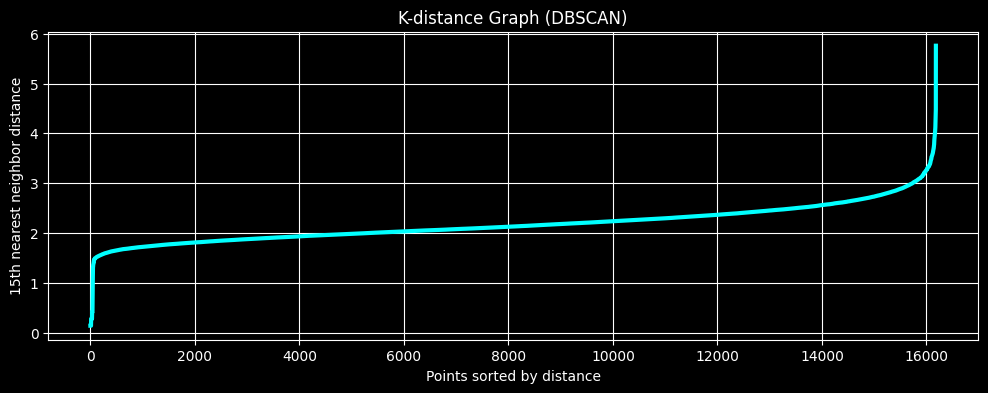

In [84]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Calcular distancia a k-ésimo vecino más cercano (k=min_samples)
neighbors = NearestNeighbors(n_neighbors=15)
neighbors_fit = neighbors.fit(X_field_pca[:, :n_components_field])
distances, indices = neighbors_fit.kneighbors(X_field_pca[:, :n_components_field])

# Ordenar y graficar distancias
distances = np.sort(distances[:, -1])
plt.figure(figsize=(12,4))
plt.plot(distances, color='cyan', linewidth=3)
plt.style.use('dark_background')
plt.grid(True)
plt.title("K-distance Graph (DBSCAN)")
plt.xlabel("Points sorted by distance")
plt.ylabel("15th nearest neighbor distance")
plt.show()


In [85]:
from sklearn.cluster import DBSCAN

# -------------------------
# DBSCAN - Jugadores df campo
# -------------------------
df_field = DBSCAN(eps=5, min_samples=5)
labels_df_field = df_field.fit_predict(X_field_pca[:, :n_components_field])
print("Clusters DBSCAN - Jugadores de Campo:", np.unique(labels_df_field, return_counts=True))

# -------------------------
# DBSCAN - Porteros
# -------------------------
df_gk = DBSCAN(eps=3, min_samples=5)
labels_df_gk = df_gk.fit_predict(X_gk_pca[:, :n_components_gk])
print("Clusters DBSCAN - Porteros:", np.unique(labels_df_gk, return_counts=True))


Clusters DBSCAN - Jugadores de Campo: (array([-1,  0]), array([    1, 16181]))
Clusters DBSCAN - Porteros: (array([0]), array([2025]))


# <span style="color: rgb(138, 92, 245);">VII. Visualización de Grupos</span>

## <span style="color: rgb(138, 92, 245);">1. K-Means</span>

In [75]:
# Función de visualización
def plot_pca_clusters(X_pca, labels, title="Clusters PCA"):
    fig = px.scatter(
        x=X_pca[:,0], y=X_pca[:,1],
        color=labels.astype(str),
        color_discrete_sequence=px.colors.sequential.Viridis,
        labels={'x':'PC1', 'y':'PC2'},
        title=title
    )
    fig.update_layout(template="plotly_dark")
    fig.show()

# -------------------------
# Jugadores de campo
# -------------------------
plot_pca_clusters(X_field_pca[:, :2], labels_field, title="KMeans - Jugadores de Campo")

# -------------------------
# Porteros
# -------------------------
plot_pca_clusters(X_gk_pca[:, :2], labels_gk, title="KMeans - Porteros")


## <span style="color: rgb(138, 92, 245);">2. DBSCAN</span>

In [86]:
import plotly.express as px
import numpy as np
import pandas as pd

# -------------------------
# Jugadores de Campo - DBSCAN
# -------------------------
df_field_db = pd.DataFrame(X_field_pca[:, :2], columns=['PC1', 'PC2'])
df_field_db['Cluster'] = labels_df_field

# Crear color especial para outliers
df_field_db['Cluster_label'] = df_field_db['Cluster'].apply(lambda x: 'Outlier' if x == -1 else f'Cluster {x}')

fig_field_db = px.scatter(
    df_field_db, x='PC1', y='PC2',
    color='Cluster_label',
    title="DBSCAN - Jugadores de Campo (PCA 2D)",
    color_discrete_sequence=px.colors.sequential.Plasma_r
)

fig_field_db.update_layout(
    template='plotly_dark',
    title_font=dict(size=20, color='lightcyan'),
    legend_title=dict(text='Clusters'),
    legend_font=dict(color='lightcyan')
)
fig_field_db.show()


# -------------------------
# Porteros - DBSCAN
# -------------------------
df_gk_db = pd.DataFrame(X_gk_pca[:, :2], columns=['PC1', 'PC2'])
df_gk_db['Cluster'] = labels_df_gk

# Color especial para outliers
df_gk_db['Cluster_label'] = df_gk_db['Cluster'].apply(lambda x: 'Outlier' if x == -1 else f'Cluster {x}')

fig_gk_db = px.scatter(
    df_gk_db, x='PC1', y='PC2',
    color='Cluster_label',
    title="DBSCAN - Porteros (PCA 2D)",
    color_discrete_sequence=px.colors.sequential.Plasma_r
)

fig_gk_db.update_layout(
    template='plotly_dark',
    title_font=dict(size=20, color='lightcyan'),
    legend_title=dict(text='Clusters'),
    legend_font=dict(color='lightcyan')
)
fig_gk_db.show()


# <span style="color: rgb(138, 92, 245);">VIII. Perfilamiento</span>

# <span style="color: rgb(138, 92, 245);">Conclusiones</span>